<IPython.core.display.Javascript object>


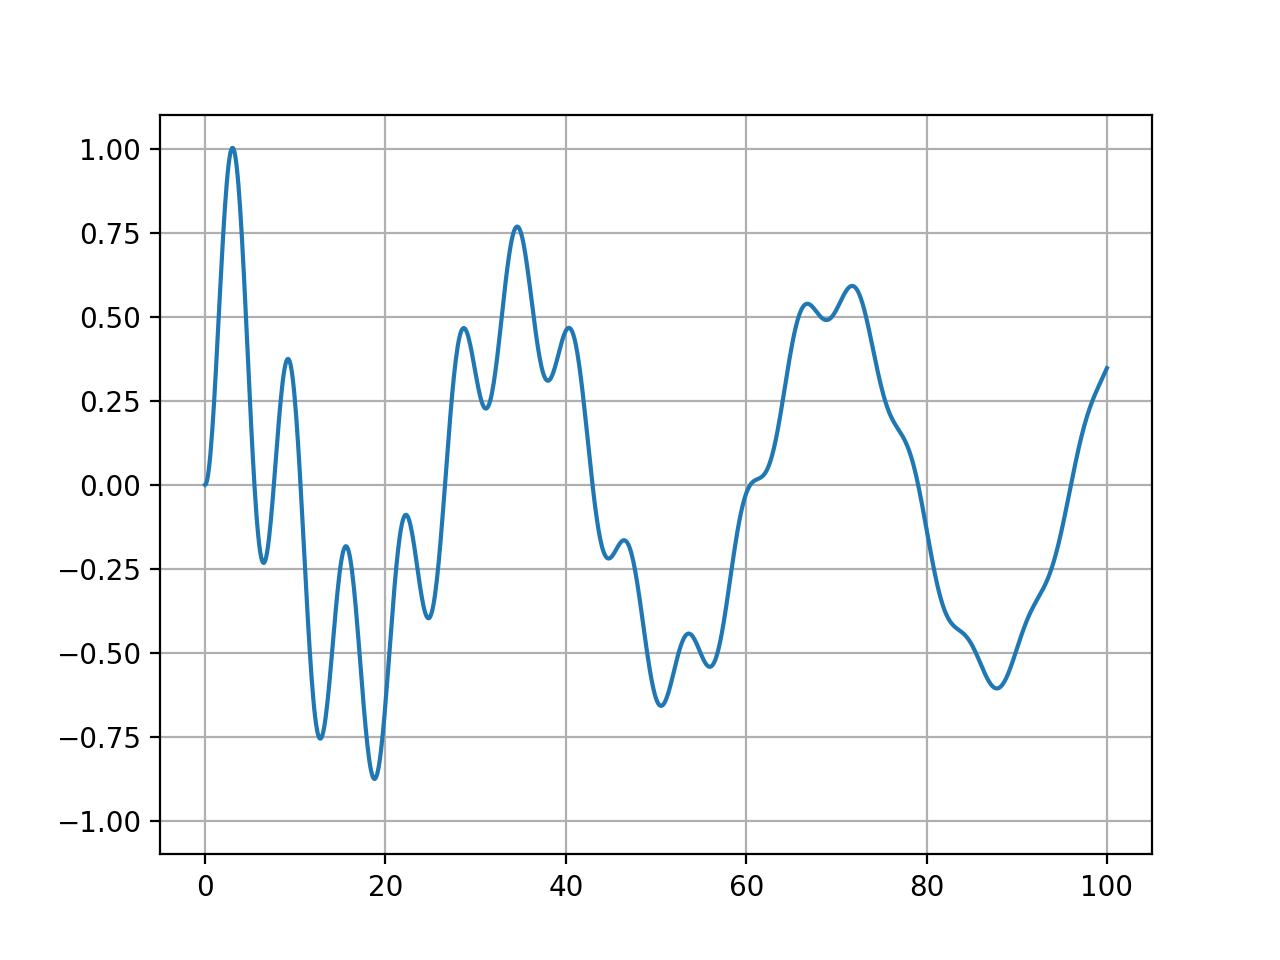

interactive(children=(FloatSlider(value=1.0, description='om0', max=10.0, min=1.0, step=0.01), FloatSlider(val…

In [14]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

def sdof(t,om0=1.0,zeta=0.0,x0=1.0,v0=0.0,a0=0.0,nu=0.0):
    Delta = (om0**2-nu**2)**2 + (2*zeta*om0*nu)**2
    A = x0-a0*(om0**2-nu**2)/Delta
    B = v0/om0 + zeta/np.sqrt(1-zeta**2)*(x0-a0*(om0**2+nu**2)/Delta)
    C = a0*(om0**2-nu**2)/Delta
    D = a0*2*zeta*om0*nu/Delta
    omD = om0*np.sqrt(1-zeta**2)
    return np.exp(-zeta*om0*t)*(A*np.cos(omD*t)+B*np.sin(omD*t))+(C*np.cos(nu*t)+D*np.sin(nu*t))

t = np.linspace(0, 100,1001)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(t, sdof(t))
ax.grid(True)

def update(om0=1.0,zeta=0.0,x0=1.0,v0=0.0,a0=0.0,nu=0.0):
    line.set_ydata(sdof(t,om0=om0,zeta=zeta,x0=x0,v0=v0,a0=a0,nu=nu))
    fig.canvas.draw_idle()

interact(update,om0=(1,10,0.01),zeta=(0,0.24,0.01),
                x0=(-1,1,0.01), v0=(-1,1,0.01),
                a0=(-2,2,0.01),nu=(0,10,0.01));